# WIP: Sales Forecasting

## Introduction

## Approach

## The Store Sales - Time Series Forecasting Competition

## The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('data/store-sales-time-series-forecasting/train.csv', index_col='date')
train.index = pd.to_datetime(train.index)
train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [31]:
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [64]:
len(train.store_nbr.unique())

54

### Time Series analysis

Text(0, 0.5, '# items on promotion')

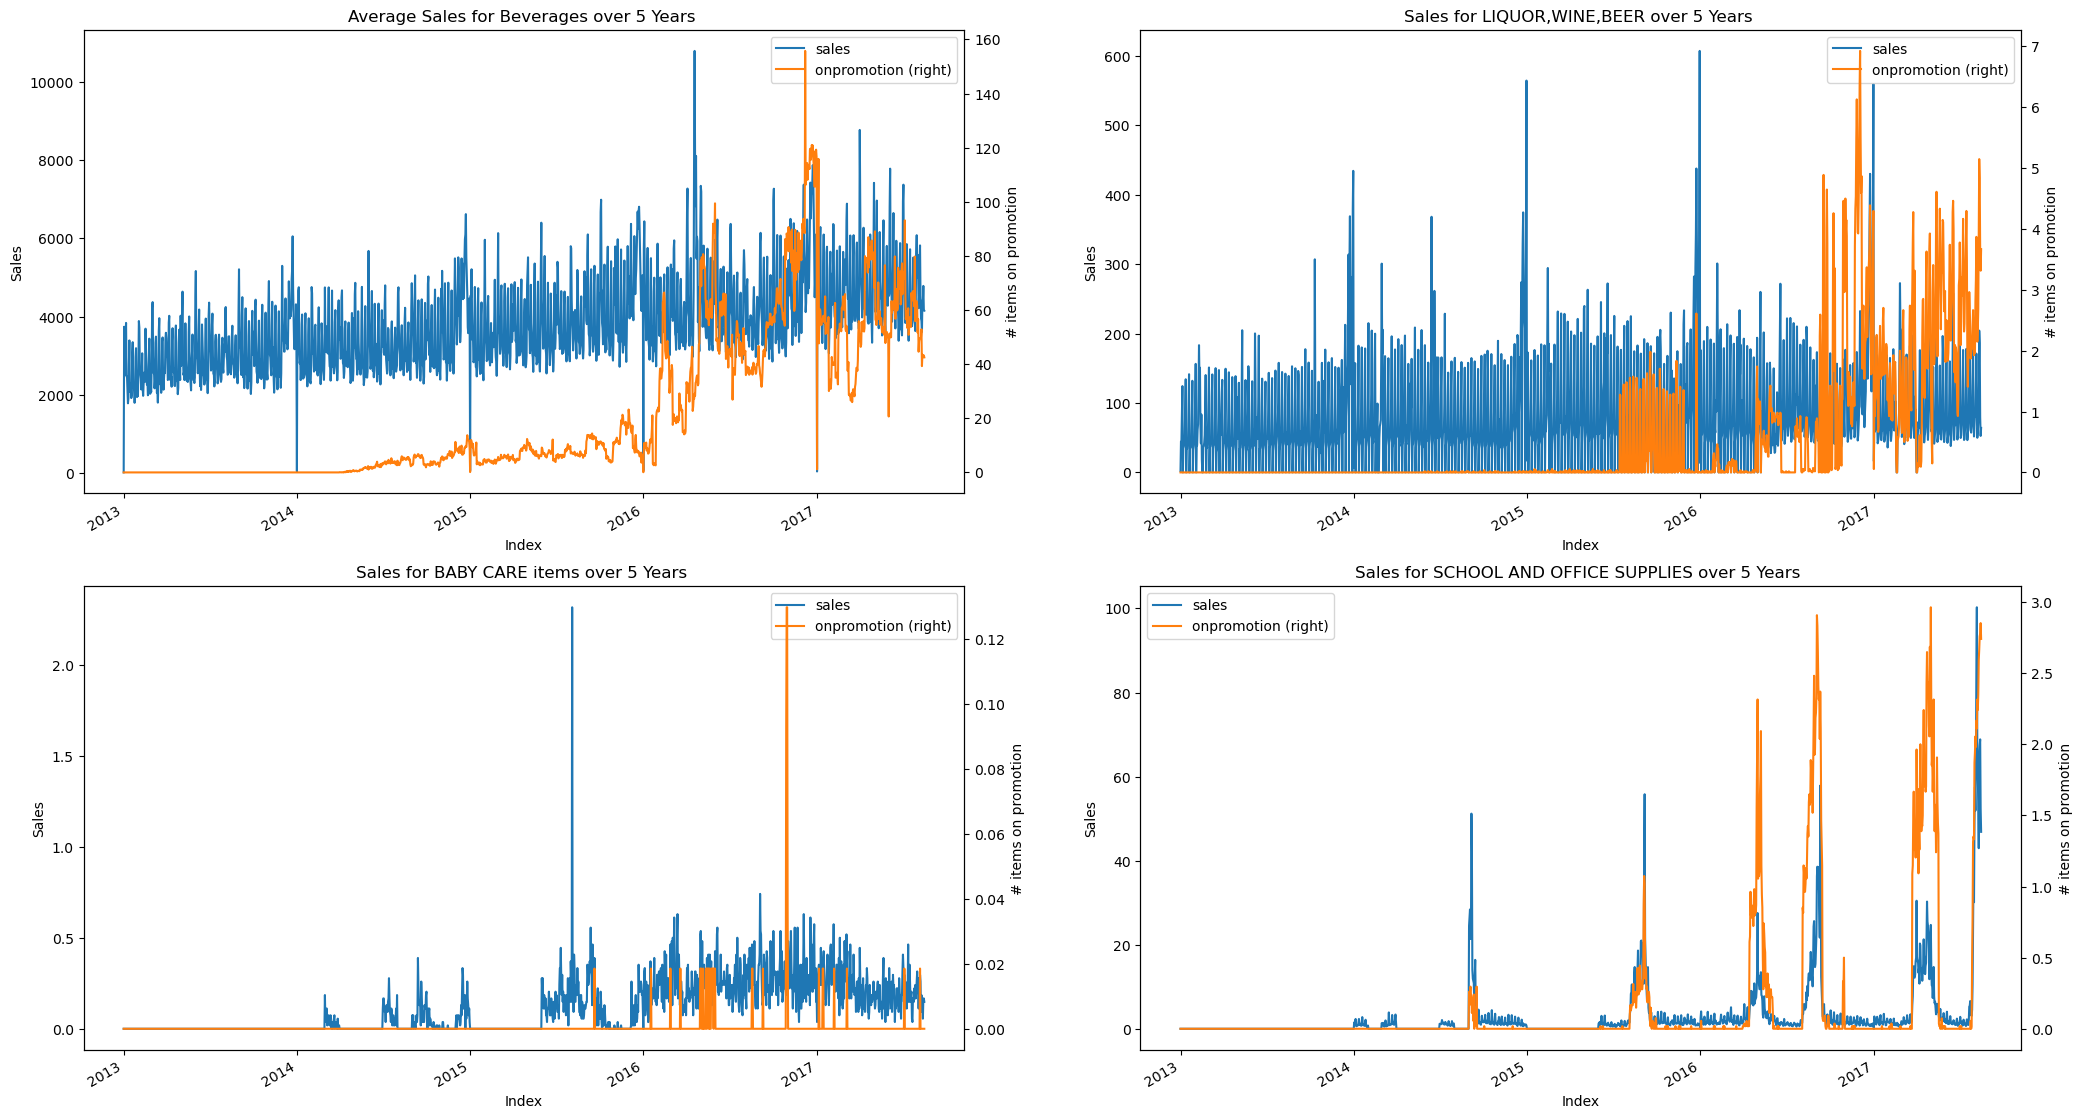

In [44]:
# Plot multiple examples of time series into a subplot

fig, ax = plt.subplots(2,2, figsize=(25,15))
train.groupby('family').get_group('GROCERY I').groupby('date')[['sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[0][0]) # compute average sales per day by family, to construct a store independent time series that can be plotted
ax[0][0].set_title('Average Sales for Beverages over 5 Years ')
ax[0][0].set_xlabel('Index')
ax[0][0].set_ylabel('Sales')
ax[0][0].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('LIQUOR,WINE,BEER').groupby('date')[['sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[0][1])
ax[0][1].set_title('Sales for LIQUOR,WINE,BEER over 5 Years ')
ax[0][1].set_xlabel('Index')
ax[0][1].set_ylabel('Sales')
ax[0][1].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('BABY CARE').groupby('date')[['sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[1][0])
ax[1][0].set_title('Sales for BABY CARE items over 5 Years ')
ax[1][0].set_xlabel('Index')
ax[1][0].set_ylabel('Sales')
ax[1][0].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('SCHOOL AND OFFICE SUPPLIES').groupby('date')[['sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[1][1])
ax[1][1].set_title('Sales for SCHOOL AND OFFICE SUPPLIES over 5 Years ')
ax[1][1].set_xlabel('Index')
ax[1][1].set_ylabel('Sales')
ax[1][1].right_ax.set_ylabel('# items on promotion')

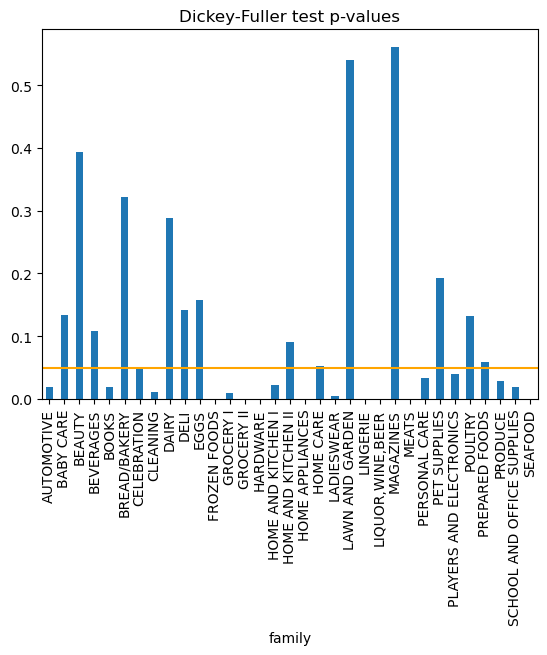

In [166]:
from statsmodels.tsa.stattools import adfuller
dickey_fuller = train.groupby('family').apply(lambda x: adfuller(x.groupby('date').mean()['sales'])[1])
ax = dickey_fuller.plot(kind='bar', title='Dickey-Fuller test p-values')
ax.axhline(y=0.05, label='significance level', color='orange')
plt.show()

### Feature Analysis

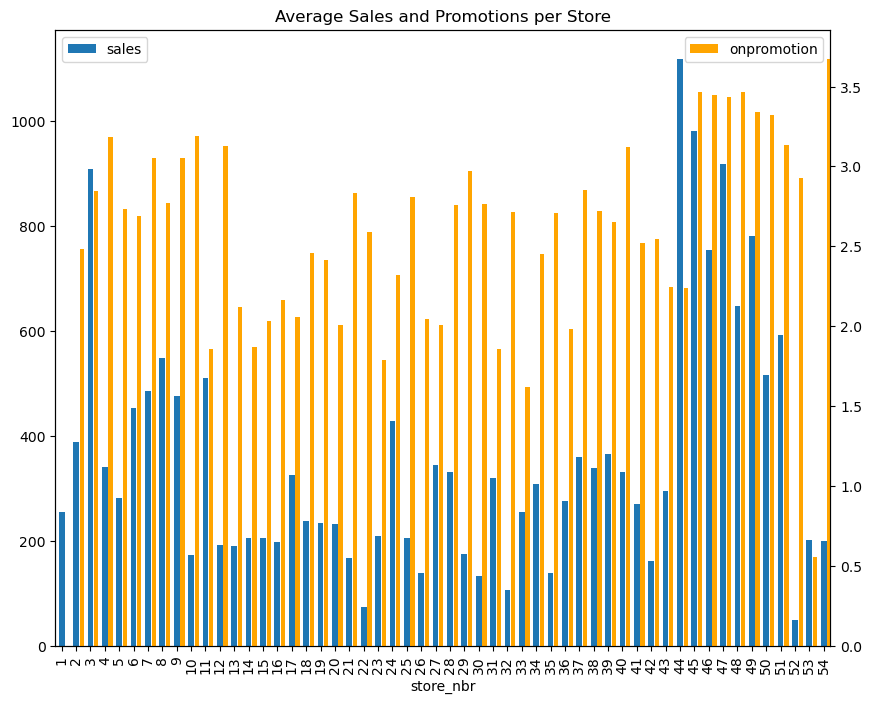

In [63]:
tmp = train[['store_nbr', 'sales', 'onpromotion']].groupby('store_nbr').mean() # compute average per store

# plot data into a bar plot with two y axis, as promotion counts are much smaller than sale values
ax = tmp.plot(kind='bar', y='sales', figsize=(10,8), width=0.4)
ax2 = ax.twinx()
ax2.bar(tmp.index + 0.4, tmp.onpromotion, width=0.3, label='onpromotion', color='orange')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Average Sales and Promotions per Store')
plt.show()

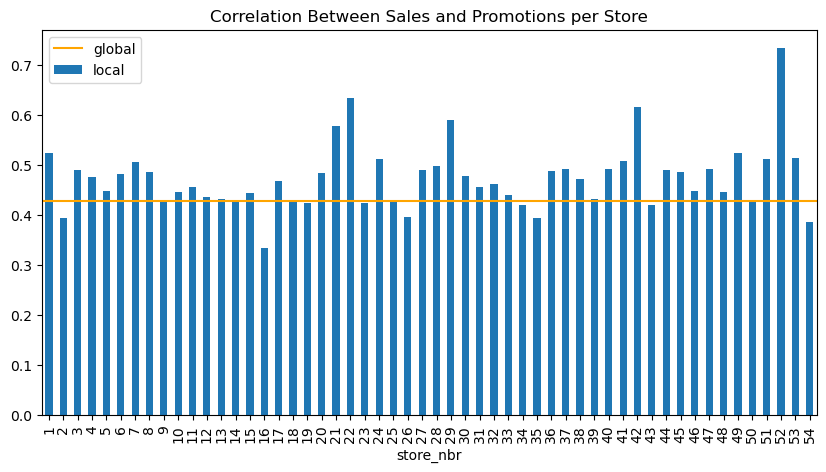

In [61]:
ax = train.groupby('store_nbr').apply(lambda group: group['sales'].corr(group['onpromotion'])).plot(kind='bar', figsize=(10,5), title='Correlation Between Sales and Promotions per Store', label='local') # Compute correlation per store
ax.axhline(y=train.sales.corr(train.onpromotion), color='orange', label='global') # Plot global correlation
plt.legend()
plt.show()


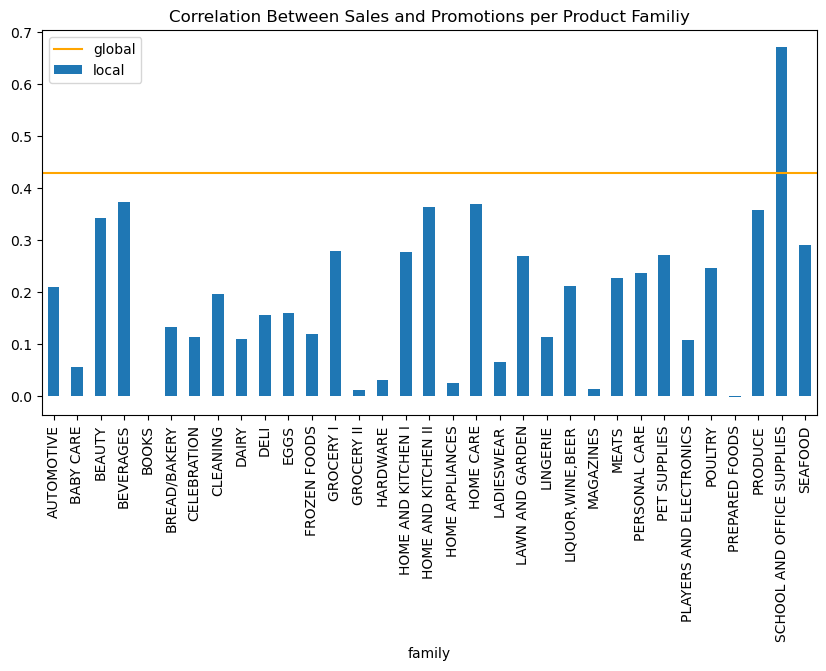

In [147]:
ax = train.groupby('family').apply(lambda group: group['sales'].corr(group['onpromotion'])).plot(kind='bar', figsize=(10,5), title='Correlation Between Sales and Promotions per Product Familiy', label='local') # Compute correlation per Product Family
ax.axhline(y=train.sales.corr(train.onpromotion), color='orange', label='global') # Plot global correlation
plt.legend()
plt.show()

### Spatial Influence

Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

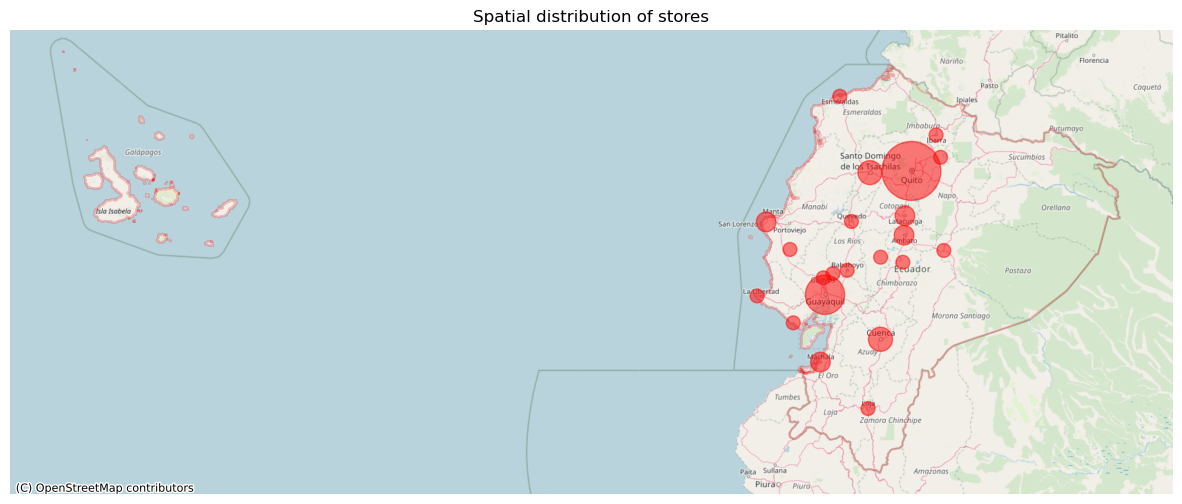

In [83]:
import geopandas as gpd
from geopy.geocoders import Nominatim
import swifter
import contextily as ctx

# Plot Number of Stores per city

# Load data and count stores per city
stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')
stores_per_city = stores_df.groupby('city')['store_nbr'].count().to_frame()
stores_per_city.rename(columns={'store_nbr': 'store_count'}, inplace=True)

geo_locator = Nominatim(user_agent='geoapiExercises')

# Retrieve geocoordinates for city and state
def get_lat_long(city, state):
    location = geo_locator.geocode(f"{city}, {state}, Ecuador")
    return location.latitude ,location.longitude

# annotate store data with geo coordinates
stores_df['coords'] = stores_df.swifter.apply(lambda row: get_lat_long(city=row['city'], state=row['state']), axis=1)

# merge number of stores per city with geodata
stores_df = pd.merge(left=stores_per_city, right=stores_df[['city', 'coords']], left_on='city', right_on='city', how='left').drop_duplicates()
stores_df['scaled_counts'] = 100 * stores_df.store_count

# Construct geopandas dataframe to enable spatial operations
gdf = gpd.GeoDataFrame(stores_df, geometry=gpd.points_from_xy(
    stores_df['coords'].apply(lambda x: x[1]),
    stores_df['coords'].apply(lambda x: x[0])
))
# change reference coordinate system to EPSG:3857, so that the background can be drawn via contextily
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")

# load ecuador borders to mark area of interest
ecuador_shapefile = gpd.read_file('data/ecuador_boundaries_2015.json')
ecuador_shapefile.crs = "EPSG:4326"
ecuador_shapefile = ecuador_shapefile.to_crs("EPSG:3857")

ax = ecuador_shapefile.boundary.plot(figsize=(15, 14), color='red', alpha=0.2) # plot boundaries
gdf.plot(ax=ax, markersize='scaled_counts', color='red', marker='o', alpha=0.5, ) # plot data, the size of the marker represents the number of stores
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.DE) # add background

ax.set_axis_off() # hide x and y axis
plt.title("Spatial distribution of stores")
plt.show()

Pandas Apply:   0%|          | 0/22 [00:00<?, ?it/s]

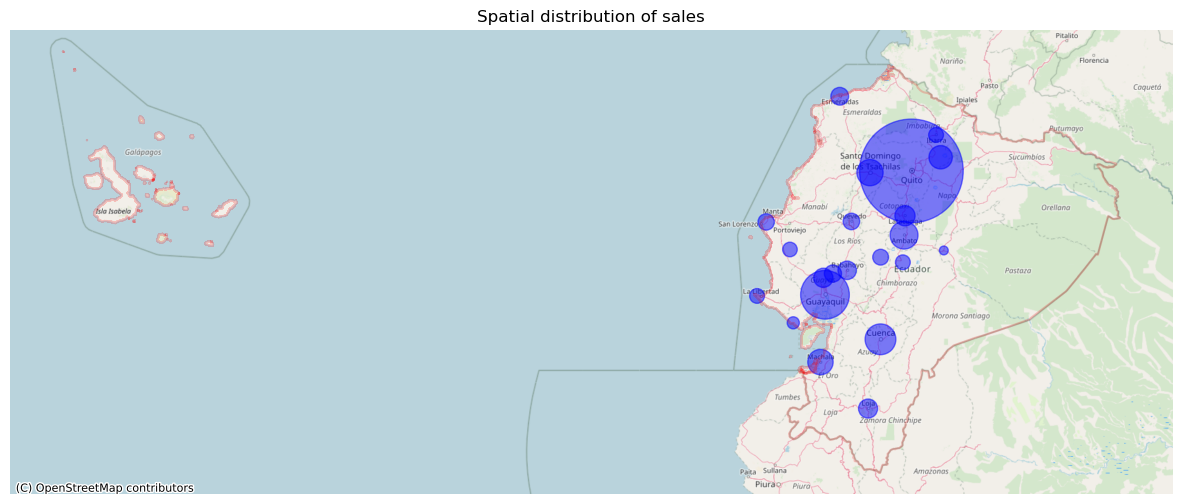

In [78]:
# Plot Sales per City

stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')

geo_locator = Nominatim(user_agent='geoapiExercises')

stores_df = pd.merge(stores_df, train[['store_nbr', 'sales', 'onpromotion']], left_on='store_nbr', right_on='store_nbr')
stores_df = pd.merge(left=stores_df[['city', 'state']], right=stores_df[['city', 'sales', 'onpromotion']].groupby('city').sum(), left_on='city', right_on='city', how='right').drop_duplicates().reset_index(drop=True) # merge sale data into stores

stores_df['sales'] = stores_df['sales'] / 100000 # scale sales data to a reasonable size that can actually be plotted

# Same procedure as above for actually plotting onto the map
def get_lat_long(city, state):
    location = geo_locator.geocode(f"{city}, {state}, Ecuador")
    return location.latitude ,location.longitude

stores_df['coords'] = stores_df.swifter.apply(lambda row: get_lat_long(city=row['city'], state=row['state']), axis=1)


gdf = gpd.GeoDataFrame(stores_df, geometry=gpd.points_from_xy(
    stores_df['coords'].apply(lambda x: x[1]),
    stores_df['coords'].apply(lambda x: x[0])
))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")
ecuador_shapefile = gpd.read_file('data/ecuador_boundaries_2015.json')
ecuador_shapefile.crs = "EPSG:4326"
ecuador_shapefile = ecuador_shapefile.to_crs("EPSG:3857")
ax = ecuador_shapefile.boundary.plot(figsize=(15, 14), color='red', alpha=0.2)
gdf.plot(ax=ax, markersize='sales', color='blue', marker='o', alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.DE)

ax.set_axis_off()
plt.title("Spatial distribution of sales")
plt.show()

Pandas Apply:   0%|          | 0/22 [00:00<?, ?it/s]

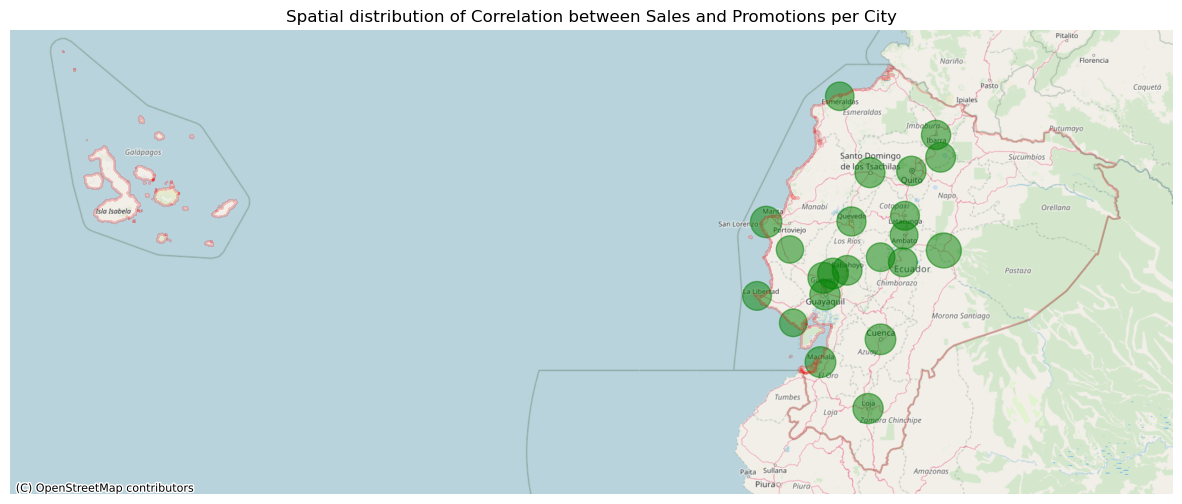

In [82]:
# Plot Correlation of Promotions and Sales per City

stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')

geo_locator = Nominatim(user_agent='geoapiExercises')

stores_df = pd.merge(stores_df, train[['store_nbr', 'sales', 'onpromotion']], left_on='store_nbr', right_on='store_nbr')
stores_df = pd.merge(
    left=stores_df[['city', 'state']],
    right=stores_df[['city', 'sales', 'onpromotion']].groupby('city').apply(lambda group: group['sales'].corr(group['onpromotion'])).to_frame().rename(columns={0:'corr'}),
    left_on='city',
    right_on='city',
    how='right'
).drop_duplicates().reset_index(drop=True) # compute and merge correlation data into stores

stores_df['corr'] = stores_df['corr'] * 1000 # scale values so that they can actually be plotted, otherwise they are just too small


# same procedure as above for actually plotting to the map
def get_lat_long(city, state):
    location = geo_locator.geocode(f"{city}, {state}, Ecuador")
    return location.latitude ,location.longitude

stores_df['coords'] = stores_df.swifter.apply(lambda row: get_lat_long(city=row['city'], state=row['state']), axis=1)


gdf = gpd.GeoDataFrame(stores_df, geometry=gpd.points_from_xy(
    stores_df['coords'].apply(lambda x: x[1]),
    stores_df['coords'].apply(lambda x: x[0])
))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")
ecuador_shapefile = gpd.read_file('data/ecuador_boundaries_2015.json')
ecuador_shapefile.crs = "EPSG:4326"
ecuador_shapefile = ecuador_shapefile.to_crs("EPSG:3857")
ax = ecuador_shapefile.boundary.plot(figsize=(15, 14), color='red', alpha=0.2)
gdf.plot(ax=ax, markersize='corr', color='green', marker='o', alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.DE)

ax.set_axis_off()
plt.title("Spatial distribution of Correlation between Sales and Promotions per City")
plt.show()

### Influence of Holidays

In [85]:
# Load Holiday Metadata
holidays = pd.read_csv('data/store-sales-time-series-forecasting/holidays_events.csv')
holidays.date = pd.to_datetime(holidays.date)
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [91]:
holidays.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [92]:
len(holidays.date.unique())

312

In [93]:
len(train.date.unique())

1684

In [143]:
# Merge, train and holiday dataframe
stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv') # load store data, as holidays are spatially dependend
train_with_locale = pd.merge(left=train, right=stores_df[['store_nbr','city', 'state']], on='store_nbr') # merge spatial info into train
train_with_holidays_and_local = pd.merge(train_with_locale, holidays, left_on=['date', 'city'], right_on=['date', 'locale_name'], how='left') # merge spatially dependent holidays
train_with_holidays_and_local = pd.merge(train_with_holidays_and_local, holidays.loc[holidays.locale == 'National'], left_on='date', right_on='date', how='left') # merge national holidays

# Merge all columns from the pd merge oprations into global ones
train_with_holidays_and_local['holiday_type'] = train_with_holidays_and_local.type_x.fillna(train_with_holidays_and_local.type_y)
train_with_holidays_and_local['holiday_locale'] = train_with_holidays_and_local.locale_x.fillna(train_with_holidays_and_local.locale_y)
train_with_holidays_and_local['holiday_description'] = train_with_holidays_and_local.description_x.fillna(train_with_holidays_and_local.description_y)
train_with_holidays_and_local.holiday_type = train_with_holidays_and_local.holiday_type.fillna('Normal day') # Fill Non Holiday days, so they still get assigned a numeric representation
train_with_holidays_and_local['holiday_id'] = pd.factorize(train_with_holidays_and_local.holiday_type)[0] # Assign Numeric Representations to holiday types
train_with_holidays_and_local.drop(columns=['type_x', 'locale_x', 'locale_name_x', 'description_x', 'transferred_x', 'type_y', 'locale_y', 'locale_name_y', 'description_y', 'transferred_y'], inplace=True) # drop unnecessary columns
train_with_holidays_and_local

,id,date,store_nbr,family,sales,onpromotion,city,state,holiday_type,holiday_locale,holiday_description,holiday_id
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,Holiday,National,Primer dia del ano,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,Normal day,NaN,NaN,1
3008276,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,Normal day,NaN,NaN,1
3008277,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,Normal day,NaN,NaN,1
3008278,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,Normal day,NaN,NaN,1


In [144]:
train_with_holidays_and_local.holiday_type.unique()

array(['Holiday', 'Normal day', 'Work Day', 'Additional', 'Event',
       'Transfer', 'Bridge'], dtype=object)

In [145]:
train_with_holidays_and_local.sales.corr(train_with_holidays_and_local.holiday_id) # calc correlation between holidays and sale changes

0.020468676992798807

<AxesSubplot: title={'center': 'Correlation Between Sales and Holidays per Product Familiy'}, xlabel='family'>

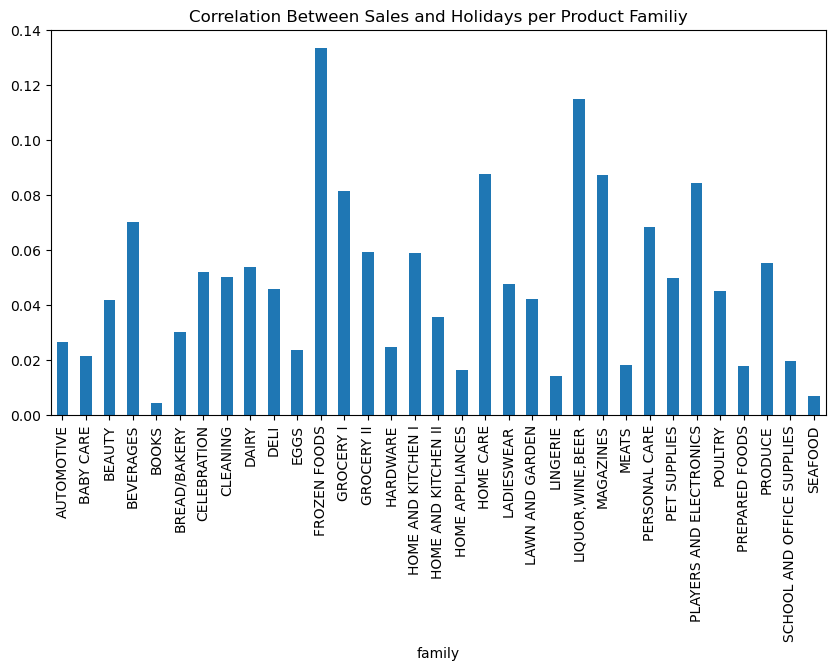

In [146]:
train_with_holidays_and_local.groupby('family').apply(lambda group: group['sales'].corr(group['holiday_id'])).plot(kind='bar', figsize=(10,5), title='Correlation Between Sales and Holidays per Product Familiy')

## Models

In [ ]:
# TODO: Look at models and determine a way to give them all the available information of the dataset

### Simple Moving Average

In [2]:
train.groupby('family').get_group('AUTOMOTIVE').groupby('date').mean()['sales'].rolling(window=7).mean().fillna(0)

/var/folders/xm/s6jjw11s1vx4n32w6313vgy80000gn/T/ipykernel_29103/541197695.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('family').get_group('AUTOMOTIVE').groupby('date').mean()['sales'].rolling(window=7).mean().fillna(0)


date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    0.000000
2013-01-05    0.000000
                ...   
2017-08-11    7.529101
2017-08-12    7.238095
2017-08-13    6.968254
2017-08-14    6.801587
2017-08-15    6.828042
Name: sales, Length: 1684, dtype: float64

In [3]:
test_sma = pd.read_csv('data/store-sales-time-series-forecasting/test.csv', index_col='date')
test_sma

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0
...,...,...,...,...
2017-08-31,3029395,9,POULTRY,1
2017-08-31,3029396,9,PREPARED FOODS,0
2017-08-31,3029397,9,PRODUCE,1


In [15]:
train_sma = train.copy()
train_sma.groupby('family').get_group('AUTOMOTIVE').groupby('store_nbr').get_group(1)['sales'].rolling(window=7).mean().fillna(0)

date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    0.000000
2013-01-05    0.000000
                ...   
2017-08-11    5.571429
2017-08-12    5.714286
2017-08-13    5.000000
2017-08-14    4.142857
2017-08-15    4.142857
Name: sales, Length: 1684, dtype: float64

In [40]:
def add_sma_for_observations(df, store_nbr, family):
    df = df.get_group((family, store_nbr))['sales'].to_frame()
    df['sma'] = df.sales.rolling(window=7).mean()
    train_length = len(df)

    df = pd.concat([df, test_sma.groupby(['family', 'store_nbr']).get_group((family, store_nbr))])
    df['sma'][train_length:] = df.sma.rolling(window=7, min_periods=1).mean()[train_length:]
    return df

In [41]:
add_sma_for_observations(train_sma.groupby(['family', 'store_nbr']), family='AUTOMOTIVE', store_nbr=1) # TODO: Something is possibly wrong here -> Ask Niklas

/var/folders/xm/s6jjw11s1vx4n32w6313vgy80000gn/T/ipykernel_29103/2518854178.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'][train_length:] = df.sma.rolling(window=7, min_periods=1).mean()[train_length:]


,sales,sma,id,store_nbr,family,onpromotion
date,,,,,,
2013-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN
2013-01-02 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN
2013-01-03 00:00:00,3.0,NaN,NaN,NaN,NaN,NaN
2013-01-04 00:00:00,3.0,NaN,NaN,NaN,NaN,NaN
2013-01-05 00:00:00,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017-08-27,NaN,NaN,3020490.0,1.0,AUTOMOTIVE,0.0
2017-08-28,NaN,NaN,3022272.0,1.0,AUTOMOTIVE,0.0
2017-08-29,NaN,NaN,3024054.0,1.0,AUTOMOTIVE,0.0


In [ ]:
train_grouped = train.groupby(['family', 'store_nbr'])
splitted_train_sma = {
    family: {
        store_nbr: add_sma_for_observations(train_grouped, store_nbr=store_nbr, family=family)
        for store_nbr in train_grouped.get_group(family).groupby('store_nbr').groups.keys()
    } for family in train_grouped.family.unique()
}

### ARIMA

In [195]:
# Forecasting needs to be done by family and store nbr
train_ma = train.copy()
train_ma_grouped = train_ma.groupby(['family', 'store_nbr'])
splitted_train_ma = {
    family: {
        store_nbr: {
            "df" : train_ma_grouped.get_group((family, store_nbr))['sales'].to_frame(),
            "lam": 0,
            "transformed": False
        }
        for store_nbr in train_ma.store_nbr.unique()
    } for family in train_ma.family.unique()
}
splitted_train_ma

{'AUTOMOTIVE': {1: {'df':             sales
   date             
   2013-01-01    0.0
   2013-01-02    2.0
   2013-01-03    3.0
   2013-01-04    3.0
   2013-01-05    5.0
   ...           ...
   2017-08-11    1.0
   2017-08-12    6.0
   2017-08-13    1.0
   2017-08-14    1.0
   2017-08-15    4.0
   
   [1684 rows x 1 columns],
   'lam': 0,
   'transformed': False},
  2: {'df':             sales
   date             
   2013-01-01    0.0
   2013-01-02    8.0
   2013-01-03    5.0
   2013-01-04    3.0
   2013-01-05    5.0
   ...           ...
   2017-08-11   14.0
   2017-08-12    7.0
   2017-08-13    9.0
   2017-08-14    4.0
   2017-08-15    2.0
   
   [1684 rows x 1 columns],
   'lam': 0,
   'transformed': False},
  3: {'df':             sales
   date             
   2013-01-01    0.0
   2013-01-02   10.0
   2013-01-03    7.0
   2013-01-04    3.0
   2013-01-05   12.0
   ...           ...
   2017-08-11   10.0
   2017-08-12    9.0
   2017-08-13   15.0
   2017-08-14    7.0
   2017-08-15   12.

In [218]:
from scipy.stats import boxcox
from tqdm import tqdm

transformed = 0
total = 0

# transform each time series into a stationary one
for stores in tqdm(splitted_train_ma.values()):
    for store_nbr_dict in stores.values():
        store_nbr_df = store_nbr_dict['df']
        p_score = adfuller(store_nbr_df.sales)[1]

        total += 1

        if p_score < 0.05 or np.isclose(p_score, 0.05) or np.isnan(p_score):
            store_nbr_df['stationary'] = store_nbr_df.sales
            continue

        store_nbr_df['boxcox'], store_nbr_dict['lam'] = boxcox(store_nbr_df.sales + 1)
        store_nbr_df['stationary'] = store_nbr_df.sales.diff()
        store_nbr_df.stationary.fillna(0, inplace=True)
        store_nbr_dict['transformed'] = True

        transformed += 1

print(f'transformed {transformed} out of {total}')

  3%|▎         | 1/33 [00:05<02:46,  5.19s/it]/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encount

transformed 478 out of 1782


<AxesSubplot: xlabel='date'>

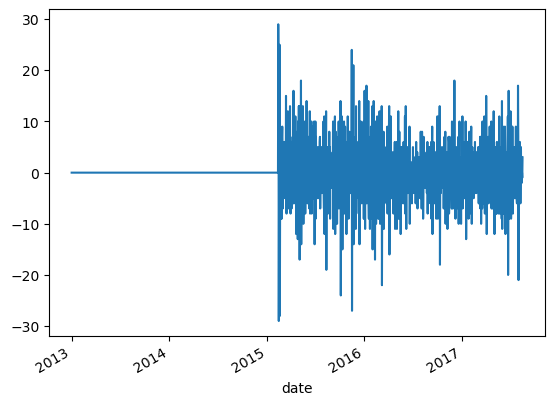

In [219]:
splitted_train_ma['AUTOMOTIVE'][20]['df'].stationary.plot()

In [221]:
np.isfinite(splitted_train_ma['AUTOMOTIVE'][20]['df'].stationary.to_numpy())

array([ True,  True,  True, ...,  True,  True,  True])

<AxesSubplot: xlabel='date'>

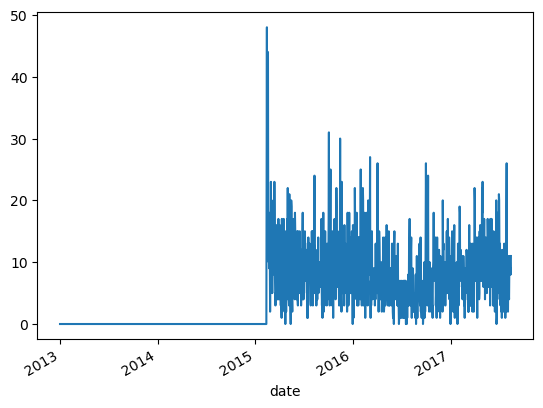

In [214]:
splitted_train_ma['AUTOMOTIVE'][20]['df'].sales.plot()

In [224]:
# recheck p_scores

still_not_stationary = 0

for family, store in tqdm(splitted_train_ma.items()):
    for store_nbr, data in store.items():
        p_score = adfuller(data['df'].stationary)[1]
        if p_score < 0.05 or np.isclose(p_score, 0.05) or np.isnan(p_score):
            continue
        still_not_stationary += 1

print(f'{still_not_stationary} out of {total} are still not stationary')

  3%|▎         | 1/33 [00:04<02:37,  4.93s/it]/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encount

0 out of 1782 are still not stationary


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# TODO: Implement ARIMA model

## Evaluation
Given via the online tool

## Conclusion